In [37]:
from IPython.display import display,HTML
c1,c2,f1,f2,fs1,fs2=\
'#11ff66','#6611ff','Wallpoet','Orbitron',20,10
def dhtml(string,fontcolor=c1,font=f1,fontsize=fs1):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family="""\
    +font+"""&effect=3d-float';</style>
    <h1 class='font-effect-3d-float' 
    style='font-family:"""+font+"""; color:"""+fontcolor+\
    """; font-size:"""+str(fontsize)+"""px;'>
    %s</h1>"""%string))

In [38]:
dhtml('Code Modules')

In [40]:
import os,h5py,seaborn as sn
import pandas as pd,numpy as np
import tensorflow as tf,pylab as pl
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as tkl
from tensorflow.keras import callbacks as tkc

In [41]:
dhtml('Functions')

In [42]:
def randi(nmin,nmax): 
    return np.random.randint(nmin,nmax)
def randch(a): 
    return np.random.choice(a,1)[0]
def randcoef():
    a=(.5+.000001*randi(1,999999))\
      *randch([-1,1])
    b=randi(3,10)
    c=.001*randi(1,99)*randch([-1,1])
    return a,b,c
def randcoord(a,b,c):
    t=np.arange(0,16*b*np.pi,1/(1440*b))
    fx=np.sin(t/6)+\
       a*np.sin(b*t)*np.cos(t)-\
       c*np.sin(16*b*t)
    fy=np.cos(t/6)+\
       a*np.sin(b*t)*np.sin(t)-\
       c*np.cos(16*b*t)
    return fx,fy
def randcol():
    return [np.random.random(3)]

In [43]:
def randplot(idx,images,labels,targets):
    a,b,c=randcoef()
    if (idx+1)%10==0:
        print('*',end='',flush=True)
    labels[idx]=b
    targets[idx]=[a,c]
    fx,fy=randcoord(a,b,c)
    pl.figure(figsize=(3,3))
    ax=pl.gca(); ax.set_axis_off()
    pl.scatter(fx,fy,s=.1**4,c=randcol())
    pl.tight_layout(pad=.05)
    fn='%03d'%idx+'.png'
    pl.savefig(fn); pl.close()
    img=tf.image.decode_image(
        tf.io.read_file(fn))
    img=img.numpy()[:,:,:3]/255
    images[idx]=img
    os.remove(fn)
def data_file(n,h5f='ArtificialImages.h5'):
    images=np.zeros((n,216,216,3),dtype=np.float32)
    labels=np.zeros((n,),dtype=np.int32)
    targets=np.zeros((n,2),dtype=np.float32)
    for idx in range(n):
        randplot(idx,images,labels,targets)
    with h5py.File(h5f,'w') as f:
        f.create_dataset('images',data=images)
        f.create_dataset('labels',data=labels)
        f.create_dataset('targets',data=targets)
        f.close()
    print('\n'); print(os.stat(h5f))

In [44]:
def display_img(s):
    ns=np.random.randint(50)
    pl.figure(figsize=(s,s))
    ax=pl.gca(); ax.set_axis_off()
    ax.imshow(images[ns])
    ti='index: %s; '%ns+\
       'label: %s; '%classes[labels[ns]]+\
       'targets: %s'%str(targets[ns])
    pl.title(ti,fontsize=16); pl.show()
def display_images(n):
    fig=pl.figure(figsize=(10,11))
    randch=np.random\
    .choice(180,size=n,replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(4,n//4,i+1,
                           xticks=[],yticks=[])
        ax.imshow(images[idx])
        label=classes[labels[idx]]
        target=targets[idx]
        ax.set_title("{} \n({})"\
                     .format(label,target))
    pl.show()  
def checkplot(n):
    global images,labels,targets
    [a,c]=targets[n]; b=labels[n]
    fx,fy=randcoord(a,b,c)
    fig=pl.figure(figsize=(8,4))
    ax=fig.add_subplot(121)
    ax.scatter(fx,fy,s=.1**4,c=randcol())
    ax.set_axis_off()
    pl.tight_layout(pad=.05)
    ax=fig.add_subplot(122)
    ax.imshow(images[n])
    ax.set_axis_off()
    pl.show()

In [45]:
def history_plot(fit_history):
    pl.figure(figsize=(10,10)); pl.subplot(211)
    keys=list(fit_history.history.keys())[0:4]
    pl.plot(fit_history.history[keys[0]],
            color=c1,label='train')
    pl.plot(fit_history.history[keys[2]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Loss")
    pl.legend(); pl.grid()
    pl.title('Loss Function')     
    pl.subplot(212)
    pl.plot(fit_history.history[keys[1]],
            color=c1,label='train')
    pl.plot(fit_history.history[keys[3]],
            color=c2,label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Accuracy")    
    pl.legend(); pl.grid()
    pl.title('Accuracy'); pl.show()

In [46]:
dhtml('One Example')

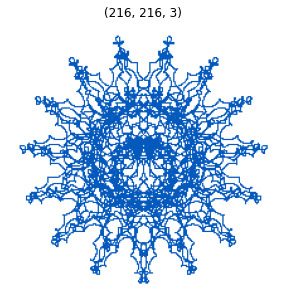

In [81]:
a,b,c=randcoef()
fx,fy=randcoord(a,b,c)
pl.figure(figsize=(3,3))
ax=pl.gca(); ax.set_axis_off()
pl.scatter(fx,fy,s=.1**4,c=randcol())
pl.tight_layout(pad=.05)
fn='%03d'%1+'.png'
pl.savefig(fn); pl.close()
img=tf.image.decode_image(
    tf.io.read_file(fn))
img=img.numpy()[:,:,:3]/255
fig=pl.figure(figsize=(5,5))
ax=fig.add_subplot(111)
ax.imshow(img)
ax.set_axis_off()
ax.set_title(str(img.shape));

In [39]:
#for el in os.listdir():
#    if el[-3:]=='png': os.remove(el)

In [48]:
dhtml('Artificial Images')

In [49]:
data_file(200)

********************

os.stat_result(st_mode=33188, st_ino=4208585, st_dev=50, st_nlink=1, st_uid=0, st_gid=0, st_size=111978848, st_atime=1600359627, st_mtime=1600360360, st_ctime=1600360360)


In [76]:
with h5py.File('ArtificialImages.h5','r') as f:
    keys=list(f.keys()); print(keys)
    images=np.array(f[keys[0]])
    labels=np.array(f[keys[1]])
    targets=np.array(f[keys[2]])
    f.close()

['images', 'labels', 'targets']


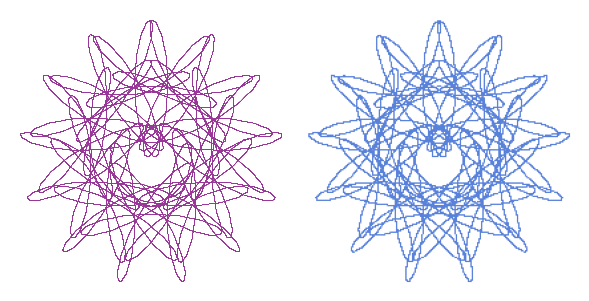

In [78]:
m=np.random.randint(labels.shape[0])
checkplot(m)

In [72]:
classes=list(set(labels))
num_classes=len(classes)
rd=dict(zip(classes,
            list(range(len(classes)))))
labels=np.array([rd.get(x,x) for x in labels],
                dtype=np.int32)
rd,classes,list(set(labels))

({3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5, 9: 6},
 [3, 4, 5, 6, 7, 8, 9],
 [0, 1, 2, 3, 4, 5, 6])

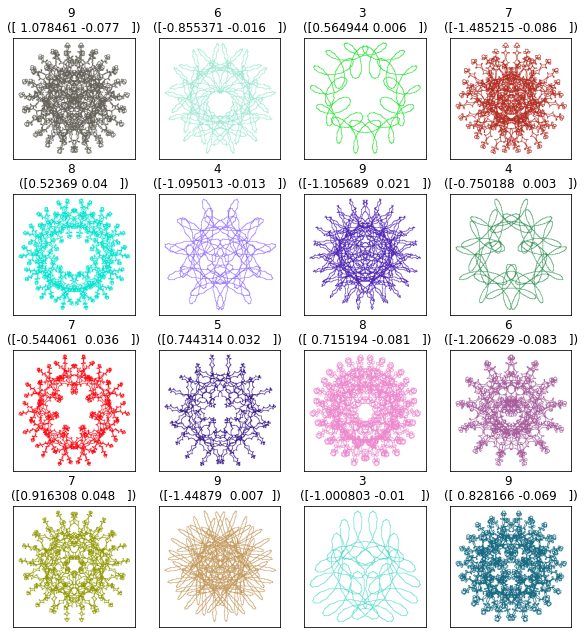

In [73]:
display_images(16)

In [53]:
#img_size=160
#images=tf.image.resize(images,\
#[img_size,img_size]).numpy()
#display_img(5)

In [55]:
dhtml('Classification')

In [56]:
N=labels.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(23).shuffle(shuffle_ids)
images=images[shuffle_ids]
labels=labels[shuffle_ids]
targets=targets[shuffle_ids]
x_test,x_valid,x_train=\
images[:n],images[n:2*n],images[2*n:]
y_test,y_valid,y_train=\
labels[:n],labels[n:2*n],labels[2*n:]
y_test2,y_valid2,y_train2=\
targets[:n],targets[n:2*n],targets[2*n:]

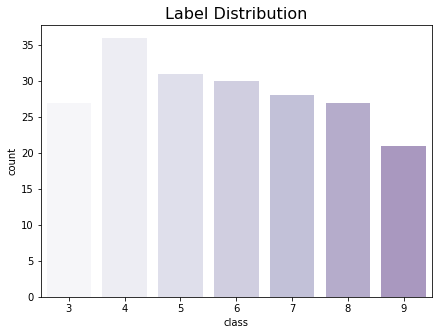

In [57]:
df=pd.DataFrame(labels,columns=['label'])
df['class']=[classes[l] for l in labels]
pl.figure(figsize=(7,5))
sn.countplot(x='class',data=df,
             palette='Purples',alpha=.5)
ti='Label Distribution'
pl.title(ti,fontsize=16);

In [58]:
del images,labels,targets

In [59]:
def cnn_model():
    model=Sequential()
    model.add(tkl.Conv2D(32,(5,5),padding='same',
                         input_shape=x_train.shape[1:]))
    model.add(tkl.Activation('relu'))
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.2))
    model.add(tkl.Conv2D(96,(5,5)))
    model.add(tkl.Activation('relu'))    
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.2))
    model.add(tkl.GlobalAveragePooling2D())    
    model.add(tkl.Dense(2048,activation='relu'))
    model.add(tkl.Dropout(.5))         
    model.add(tkl.Dense(num_classes))
    model.add(tkl.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',metrics=['accuracy'])
    return model
def cb(fw):
    early_stopping=tkc\
    .EarlyStopping(monitor='val_loss',
                   patience=20,verbose=2)
    checkpointer=tkc\
    .ModelCheckpoint(filepath=fw,verbose=2,
                     save_best_only=True)
    lr_reduction=tkc\
    .ReduceLROnPlateau(monitor='val_loss',verbose=2,
                       patience=5,factor=.8)
    return [checkpointer,early_stopping,lr_reduction]

In [60]:
cnn_model=cnn_model()
fw='weights.best.hdf5'
history=cnn_model\
.fit(x_train,y_train,epochs=200,
     batch_size=8,verbose=2,
     validation_data=(x_valid,y_valid),
     callbacks=cb(fw))

Epoch 1/200

Epoch 00001: val_loss improved from inf to 1.97493, saving model to weights.best.hdf5
20/20 - 1s - loss: 1.9550 - accuracy: 0.1375 - val_loss: 1.9749 - val_accuracy: 0.0500
Epoch 2/200

Epoch 00002: val_loss improved from 1.97493 to 1.96013, saving model to weights.best.hdf5
20/20 - 1s - loss: 1.9400 - accuracy: 0.1688 - val_loss: 1.9601 - val_accuracy: 0.2000
Epoch 3/200

Epoch 00003: val_loss did not improve from 1.96013
20/20 - 1s - loss: 1.9288 - accuracy: 0.1875 - val_loss: 1.9835 - val_accuracy: 0.2000
Epoch 4/200

Epoch 00004: val_loss did not improve from 1.96013
20/20 - 1s - loss: 1.9213 - accuracy: 0.1813 - val_loss: 1.9937 - val_accuracy: 0.0500
Epoch 5/200

Epoch 00005: val_loss did not improve from 1.96013
20/20 - 1s - loss: 1.9269 - accuracy: 0.1562 - val_loss: 1.9839 - val_accuracy: 0.2000
Epoch 6/200

Epoch 00006: val_loss did not improve from 1.96013
20/20 - 1s - loss: 1.8970 - accuracy: 0.2125 - val_loss: 2.0035 - val_accuracy: 0.2000
Epoch 7/200

Epoch 0

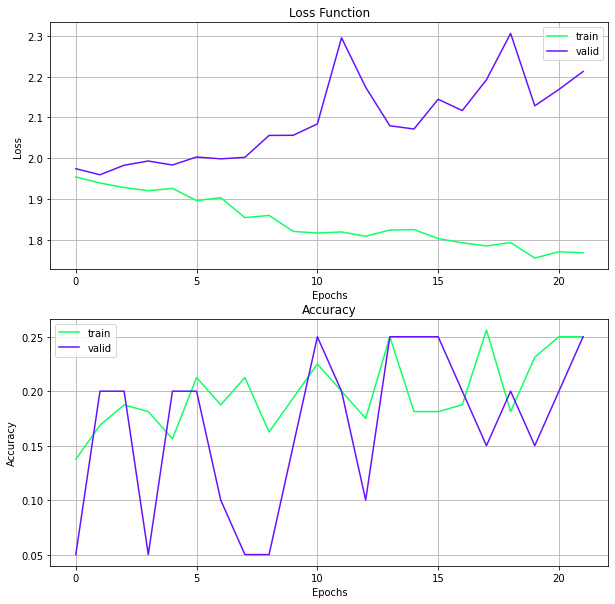

In [61]:
history_plot(history)

In [62]:
cnn_model.load_weights(fw)
cnn_model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 1.9639 - accuracy: 0.1500


[1.963901162147522, 0.15000000596046448]